<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/Stat_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/VAS DATA.csv')

In [ ]:
pain_vas_A = data[data['Group'] == 'A']['VAS_after']
pain_vas_B = data[data['Group'] == 'B']['VAS_after']

In [ ]:
# Check for normality using Shapiro-Wilk test
stat_A, p_value_A = shapiro(pain_vas_A)
stat_B, p_value_B = shapiro(pain_vas_B)

In [ ]:
print(f"Shapiro-Wilk Test for Group A (VAS_after): Statistic={stat_A}, p-value={p_value_A}")
print(f"Shapiro-Wilk Test for Group B (VAS_after): Statistic={stat_B}, p-value={p_value_B}")

Shapiro-Wilk Test for Group A (VAS_after): Statistic=0.8766918778419495, p-value=0.03447547182440758
Shapiro-Wilk Test for Group B (VAS_after): Statistic=0.967999279499054, p-value=0.8052504062652588


Perform paired t-tests for each group

In [ ]:
# Paired t-test for Group A
t_stat_A, p_value_A_ttest = ttest_rel(data[data['Group'] == 'A']['VAS_before'], pain_vas_A)

# Paired t-test for Group B
t_stat_B, p_value_B_ttest = ttest_rel(data[data['Group'] == 'B']['VAS_before'], pain_vas_B)

print(f"Paired t-test for Group A: t-statistic={t_stat_A}, p-value={p_value_A_ttest}")
print(f"Paired t-test for Group B: t-statistic={t_stat_B}, p-value={p_value_B_ttest}")

Paired t-test for Group A: t-statistic=12.020636761607365, p-value=4.222387149759222e-09
Paired t-test for Group B: t-statistic=2.425215564365917, p-value=0.028388835328631176


Perform independent t-test for average change in pain level between groups

In [ ]:
# Independent t-test for average change in pain level between groups
t_stat_AB, p_value_AB_ttest = ttest_ind(pain_vas_A - data[data['Group'] == 'A']['VAS_before'],
                                        pain_vas_B - data[data['Group'] == 'B']['VAS_before'])

print(f"Independent t-test for average change in pain level between Group A and B: t-statistic={t_stat_AB}, p-value={p_value_AB_ttest}")

Independent t-test for average change in pain level between Group A and B: t-statistic=-11.120642756667216, p-value=3.645234327751725e-12


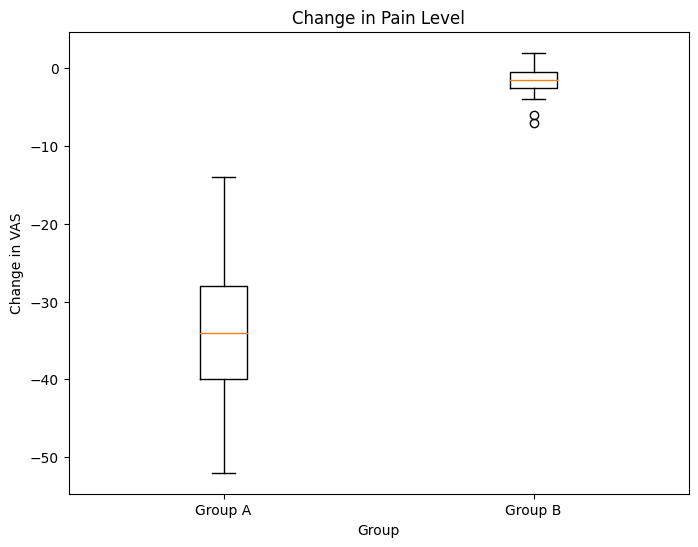

In [ ]:
# Box-whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot([pain_vas_A - data[data['Group'] == 'A']['VAS_before'], pain_vas_B - data[data['Group'] == 'B']['VAS_before']],
            labels=['Group A', 'Group B'])
plt.title('Change in Pain Level')
plt.xlabel('Group')
plt.ylabel('Change in VAS')
plt.show()